In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
%matplotlib inline

### generate dataset

In [364]:
from sklearn.datasets import make_classification

In [365]:
X, Y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0,n_repeated=0, random_state=3, n_clusters_per_class=1)

In [366]:
# convert the labels into {-1, 1}
Y[Y==0] = -1

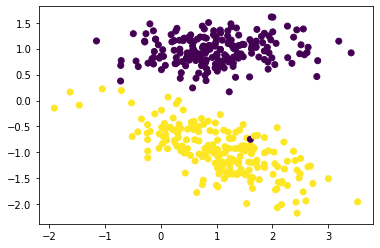

In [367]:
plt.scatter(X[:, 0], X[:, 1], c=Y);

### SVM class

In [368]:
class SVM:
    
    def __init__(self, C = 1.0):
        self.C = C
        # loss and weight zero in the begining
        self.W = 0 
        self.b = 0
    
    def hinge_loss(self, W, b, X, Y):
        loss = 0.0
        # L = 1/2*dot(W, W.T) + c*simga(max(0, 1-ti))
        loss += 0.5*np.dot(W, W.T)
        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(W, X[i].T) + b)
            loss += self.C*max(0, 1 - ti)
        return loss[0][0]
    
    def fit(self, X, Y, batch_size = 100, learning_rate = 0.001, max_iter = 300):
        n_features = X.shape[1]
        n_samples = X.shape[0]
        n = learning_rate
        c = self.C
        
        # initialize the model paramete
        w = np.zeros((1,n_features))
        b = 0.0
        
        losses = []
        ids = np.arange(n_samples)
        
        # bias and weight update rule
        for i in range(max_iter):
            # training loop
            l = self.hinge_loss(w, b,  X, Y)
            losses.append(l)
            
            # we will use mini batch method (as recommended in tha paper)
            for batch_start in range(0, n_samples, batch_size):
                gradw = 0.0
                gradb = 0.0
                for j in range(batch_start, batch_start+batch_size):
                    if j < n_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(w, X[i].T) + b)
                        if ti >= 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
            # gradient for the batch is ready update the W, B
            w = w - n*w + n*gradw
            b = b + n*gradb
        
        self.W = w
        self.b = b
        
        return w, b, losses
            
                    
                
        
        

In [369]:
svm = SVM(C=1)

In [370]:
W, bias, losses = svm.fit(X, Y)

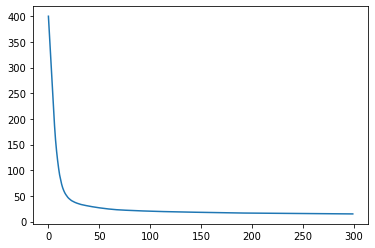

In [371]:
plt.plot(losses);

In [372]:
def plot_hyperplane(w1, w2, bias):
    plt.figure(figsize=(12, 12))
    plt.scatter(X[:, 0], X[:, 1], c=Y);
    x1 = np.linspace(-2, 4, 10)
    x2 = -(w1*x1 + bias)/w2
    
    # positive hyper plane
    xp = -(w1*x1 + bias - 1)/w2
    
    # negative hyper plane
    xn = -(w1*x1 + bias + 1)/w2
    
    plt.plot(x1, x2, label = 'Hyperplane WX + B = 0')
    plt.plot(x1, xp, label = 'Hyperplane WX + B = 1')
    plt.plot(x1, xn, label = 'Hyperplane WX + B = -1')
    
    plt.legend()
    plt.show()

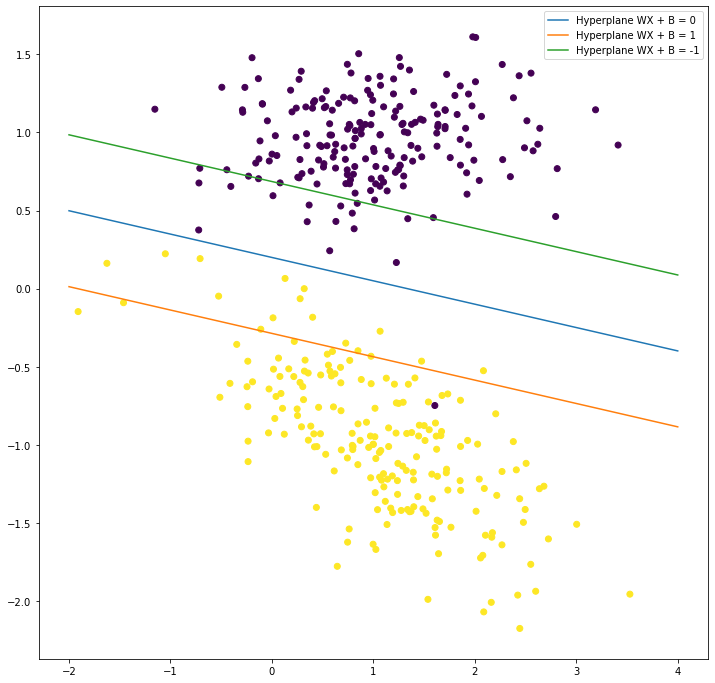

In [373]:
plot_hyperplane(W[0, 0], W[0, 1], bias)

### visualizing hyperplanes

In [374]:
svm1 = SVM(C=-1)
W1, B1, losses = svm1.fit(X, Y) 


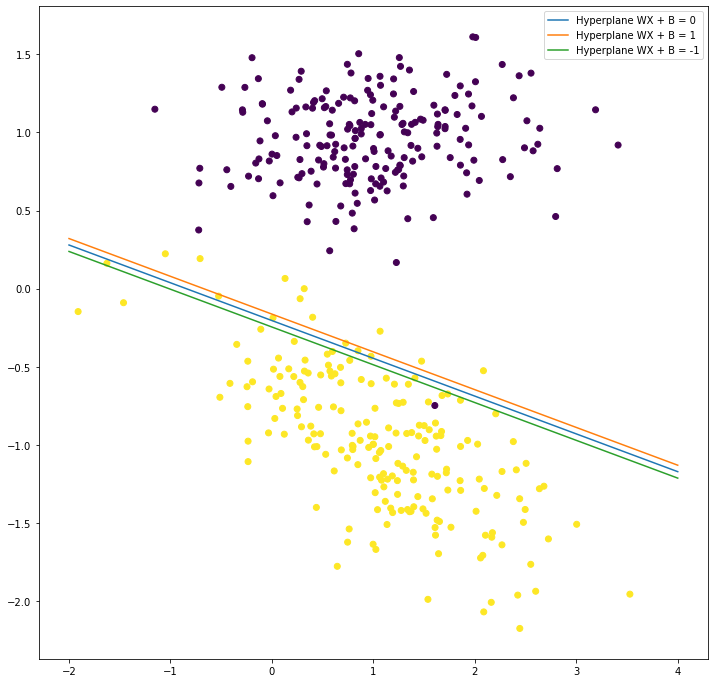

In [375]:
plot_hyperplane(W1[0, 0], W1[0, 1], B1)

In [376]:
svm2 = SVM(C=0.01)
W2, B2, losses2 = svm2.fit(X, Y) 


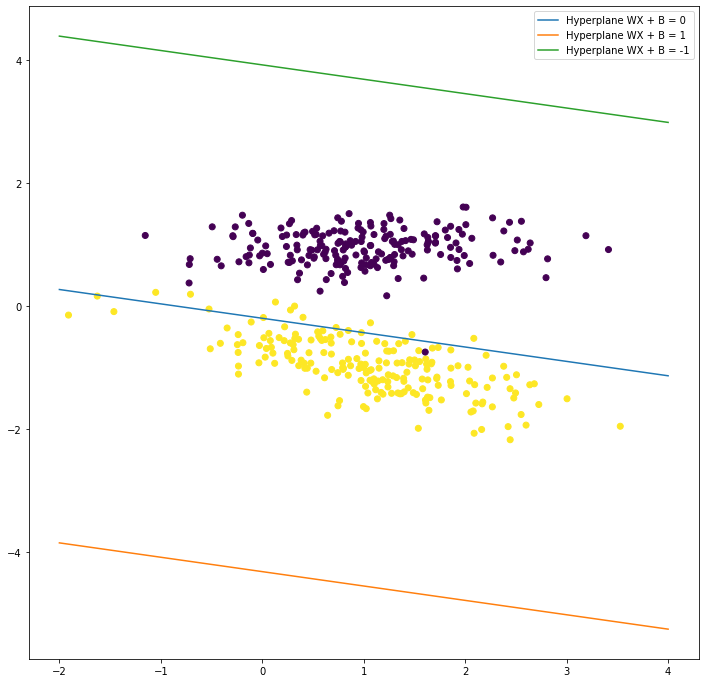

In [377]:
plot_hyperplane(W2[0, 0], W2[0, 1], B2)

### Handling non-linearly seperable data
- key idea is take the data into some higher dimensions

In [243]:
from sklearn.datasets import make_circles

In [496]:
X, Y = make_circles(n_samples=400,
    shuffle=True,
    noise=0.02,
    random_state=3,
    factor=0.8)

In [497]:
print(X.shape)
print(Y.shape)

(400, 2)
(400,)


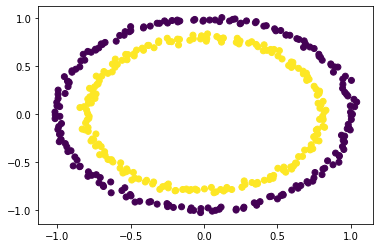

In [498]:
plt.scatter(X[:, 0], X[:, 1], c=Y);

### non linear transformation ..projecting the data into some high dimensional space

In [499]:
def phi(X):
    """some non linear transformation"""
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X1**2 + X2**2
    X = np.hstack((X, X3.reshape(-1, 1)))
    return X

In [500]:
X_new = phi(X)

In [501]:
print(X_new.shape)

(400, 3)


In [502]:
def plot3d(data, show=True):
    fig = plt.figure(figsize=(10,  10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], zdir ='z', s=20, c=Y, depthshade=True)
    if show == True:
        plt.show()
    return ax

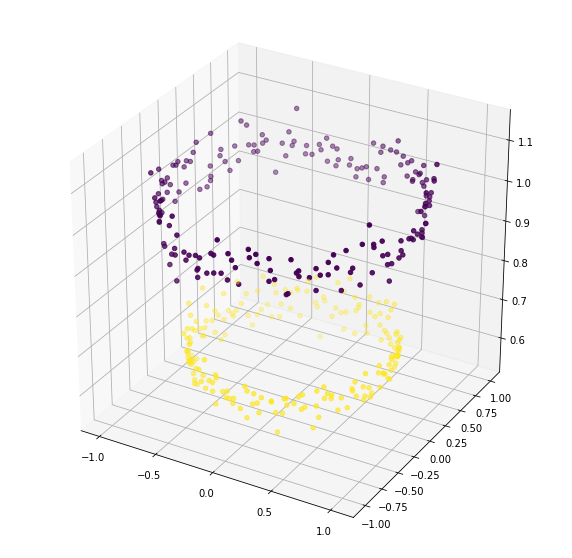

In [503]:
plot3d(X_new)

### applying linear model

In [504]:
from sklearn.linear_model import LogisticRegression

In [505]:
lr = LogisticRegression()

In [506]:
lr.fit(X, Y)

/home/macab/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [507]:
lr.score(X, Y)

0.5025

In [508]:
lr1 = LogisticRegression()

In [509]:
lr1.fit(X_new, Y)

/home/macab/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [510]:
lr1.score(X_new, Y)

1.0

In [511]:
wts = lr1.coef_
bias = lr1.intercept_

In [512]:
wts

array([[ 0.0309461 ,  0.00993977, -8.05465257]])

In [513]:
xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))

In [514]:
yy

array([[-2, -2, -2, -2],
       [-1, -1, -1, -1],
       [ 0,  0,  0,  0],
       [ 1,  1,  1,  1]])

In [515]:
z = -(wts[0, 0]*xx + wts[0, 1]*yy + bias)/wts[0, 2]

In [516]:
z

array([[0.79797821, 0.80182022, 0.80566224, 0.80950425],
       [0.79921225, 0.80305426, 0.80689628, 0.8107383 ],
       [0.80044629, 0.8042883 , 0.80813032, 0.81197234],
       [0.80168033, 0.80552235, 0.80936436, 0.81320638]])

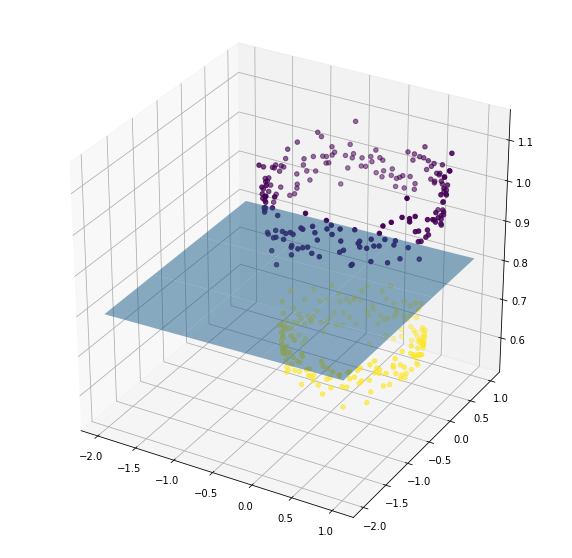

In [517]:
ax = plot3d(X_new, False)
ax.plot_surface(xx, yy, z, alpha = 0.5);